I downloaded data from kaggle challenge and let's make an overview of our data.

In [16]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from skimage import io, transform
%matplotlib inline
from collections import Counter

import warnings
warnings.filterwarnings("ignore")


In [3]:
!ls ../humpback-whale-identification/

csv	   sample_submission.csv  test_sample  train	  train.zip
embedding  test			  test.zip     train.csv


In [4]:
train_image_file='../humpback-whale-identification/train'
train_label_file="../humpback-whale-identification/train.csv"
test_image_file="../humpback-whale-identification/test"

In [8]:
train_df = pd.read_csv(train_label_file)
train_df.head()

Image         Id
0  0000e88ab.jpg  w_f48451c
1  0001f9222.jpg  w_c3d896a
2  00029d126.jpg  w_20df2c5
3  00050a15a.jpg  new_whale
4  0005c1ef8.jpg  new_whale

So the csv has two columns: one is name of image, in .jpg, the other if Id of the image i.e. Let's show one image and see its dimension.

(476, 1050, 3)


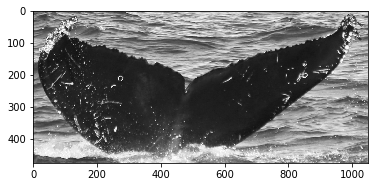

In [10]:
image_file=os.path.join(train_image_file,train_df.iloc[10,0])
image=io.imread(image_file)
print(image.shape)
plt.imshow(image)

In [11]:
print("Number of training frame: ", len(train_df))
counter = Counter(train_df["Id"]) 
print("Number of pieces: ", len(counter))
print(counter)

Number of training frame:  25361
Number of pieces:  5005
Counter({'new_whale': 9664, 'w_23a388d': 73, 'w_9b5109b': 65, 'w_9c506f6': 62, 'w_0369a5c': 61, 'w_700ebb4': 57, 'w_3de579a': 54, 'w_564a34b': 51, 'w_fd3e556': 50, 'w_88e4537': 49, 'w_2b069ba': 48, 'w_d405854': 47, 'w_f0fe284': 45, 'w_789c969': 45, 'w_778e474': 40, 'w_5e8e218': 40, 'w_343f088': 40, 'w_a9304b9': 37, 'w_60ce6fc': 37, 'w_5a2634c': 37, 'w_6822dbc': 36, 'w_af367c3': 35, 'w_1ca9ab1': 34, 'w_f765256': 34, 'w_17b0d3a': 33, 'w_d72771c': 32, 'w_08630fd': 31, 'w_6cda039': 31, 'w_8c25681': 31, 'w_04003e9': 30, 'w_fd6a3ad': 30, 'w_51fc1fc': 30, 'w_2365d55': 29, 'w_59052ad': 29, 'w_6caff0f': 27, 'w_91cc02c': 25, 'w_bfcad53': 25, 'w_0a155b9': 24, 'w_b9e5911': 24, 'w_27597ff': 24, 'w_990921b': 24, 'w_cd4cb49': 24, 'w_75f6ffa': 24, 'w_0bc078c': 24, 'w_0135f5f': 23, 'w_5773c71': 23, 'w_e1ffbe2': 23, 'w_242fb46': 23, 'w_488865e': 22, 'w_8da30ad': 22, 'w_f61b957': 22, 'w_60cf87c': 22, 'w_efbdcbc': 22, 'w_bc285a6': 21, 'w_5597026': 2

Well, there are more than 5000 whales, total 25 361 images in which 9 664 are unknown whales. The most photographed whale is taken 73 times, several are taken only one time. 

In [12]:
num_pieces_dict = {}
for key, val in dict(counter).items():
    if val not in num_pieces_dict:
        num_pieces_dict[val] = [key]
    else:
        num_pieces_dict[val].append(key)

In [13]:
for key in sorted(num_pieces_dict.keys()):
    print(key, " : ", len(num_pieces_dict[key]))

1  :  2073
2  :  1285
3  :  568
4  :  273
5  :  172
6  :  136
7  :  86
8  :  76
9  :  62
10  :  46
11  :  39
12  :  26
13  :  14
14  :  16
15  :  19
16  :  16
17  :  17
18  :  6
19  :  8
20  :  7
21  :  7
22  :  5
23  :  4
24  :  7
25  :  2
27  :  1
29  :  2
30  :  3
31  :  3
32  :  1
33  :  1
34  :  2
35  :  1
36  :  1
37  :  3
40  :  3
45  :  2
47  :  1
48  :  1
49  :  1
50  :  1
51  :  1
54  :  1
57  :  1
61  :  1
62  :  1
65  :  1
73  :  1
9664  :  1


Indeed, there are 2073/5004 whales seen only one times (41 \%), 1285/5004 seen 2 times (25.7\%), totally 4199/5004 whales 84\% seen under 5 times. Very few whales are appeared more than 10 times (only 227 whales, 4.5\%). I will display some photos of a same whale.

In [14]:
image_repeat_4=num_pieces_dict [4][:2]
image_repeat_4_file=train_df[train_df.Id.isin(image_repeat_4)]
image_repeat_4_file

Image         Id
1      0001f9222.jpg  w_c3d896a
2      00029d126.jpg  w_20df2c5
2864   1d6ccd05a.jpg  w_c3d896a
4362   2cccac55a.jpg  w_c3d896a
14794  94e15dfd2.jpg  w_20df2c5
16550  a6766b182.jpg  w_20df2c5
20142  cad8eabe4.jpg  w_c3d896a
21159  d5098b5a1.jpg  w_20df2c5

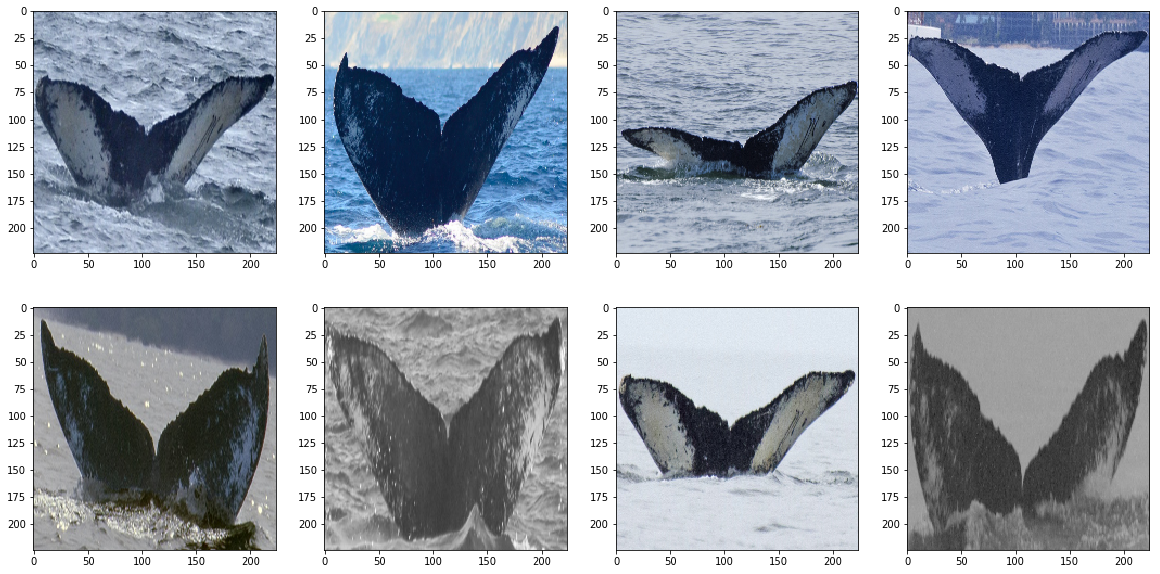

In [17]:
fig=plt.figure(figsize=(20,10))

for i in range(len(image_repeat_4_file)):
    image_file=os.path.join(train_image_file,image_repeat_4_file.iloc[i,0])
    
    image=transform.resize(io.imread(image_file), (224,224))

    ax=plt.subplot(2,4,i+1)
    imgplot = plt.imshow(image)
    
    

plt.show()


In [19]:
shapes=[]
for i in range(len(train_df)):
    image_file=os.path.join(train_image_file,train_df.iloc[i,0])
    image=io.imread(image_file)
    shapes.append(image.shape)

In [20]:
shapes_2=[shapes[i] for i in range(len(shapes)) if len(shapes[i])==2]

print('number of two dimentions:',len(shapes_2))
print('number of images:', len(shapes))

number of two dimentions: 3386
number of images: 25361


So there are 3386 images of two dimentions. I don't want to complicated the problem, and from my experiment, gray scale doesn't hurt the accuracy, sometimes it works even better than 3-color scale, so I should consider to convert all images to gray scale.

I will choose one 1-color image and show it.

(600, 1050)


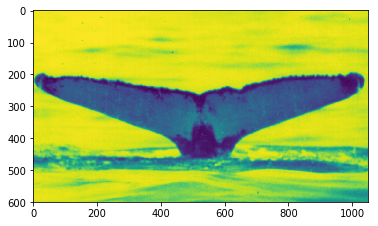

In [21]:
for i in range(len(shapes)):
    if len(shapes[i])==2:
        image=train_df.iloc[i]
        break
image_file=os.path.join(train_image_file,image[0])
image_im=io.imread(image_file)
print(image_im.shape)
plt.imshow(image_im)

Let's check the distribution of size of images.

min of widths: 30 and max 1575
min of lengths: 77 and max 5959


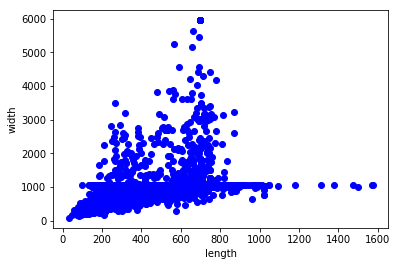

In [22]:
widths=[shapes[i][0] for i in range(len(shapes))]
lengths=[shapes[i][1] for i in range(len(shapes))]
print(f"min of widths: {min(widths)} and max {max(widths)}" )
print(f"min of lengths: {min(lengths)} and max {max(lengths)}" )

plt.plot(widths, lengths, 'bo')
plt.ylabel('width')
plt.xlabel('length')
plt.show()

The overview suggests that we should choose one-shot recognition model since there are many whales with only one image. Most of whales are photographed very few times, so we lack data to classify a new image by regular classification model. 

The diversity of size enforces us to resize images. Since some have low resolution, I think 224\*224 could be good potential one.

Data mixes 1 and 3 channel images so we need also to take care of this issue.